In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, average_precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

sns.set_theme(style = 'whitegrid', context='talk', palette='Greys')

In [49]:
def compute_kruscal(sp_data_full, sp_data_full_mlp, sp_data_full_rf):
    ap = kruskal(sp_data_full["ap"], sp_data_full_mlp["ap"], sp_data_full_rf["ap"])
    accuracy = kruskal(
        sp_data_full["accuracy"],
        sp_data_full_mlp["accuracy"],
        sp_data_full_rf["accuracy"],
    )
    precision = kruskal(
        sp_data_full["precision"],
        sp_data_full_mlp["precision"],
        sp_data_full_rf["precision"],
    )
    recall = kruskal(
        sp_data_full["recall"], sp_data_full_mlp["recall"], sp_data_full_rf["recall"]
    )
    f1 = kruskal(sp_data_full["f1"], sp_data_full_mlp["f1"], sp_data_full_rf["f1"])
    print(ap)
    print(accuracy)
    print(precision)
    print(recall)
    print(f1)

## MLP Data

In [50]:
mlp = MLPClassifier(
    alpha=0.01,
    hidden_layer_sizes=(100,),
    learning_rate="constant",
    learning_rate_init=0.01,
    max_iter=200,
)
rf = RandomForestClassifier(
    max_depth=10,
    max_features="sqrt",
    min_samples_leaf=4,
    min_samples_split=5,
    n_estimators=200,
)
xgb = XGBClassifier(
    colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=4, subsample=0.8
)

In [51]:
data = pd.read_csv('../data/bias_symptoms_mlp.csv', index_col=[0,1])
data.index = data.index.droplevel(0)
labels = ['statistical_parity', 'equal_opportunity', 'average_odds']

In [52]:
# AUC

sp_mlp_train = []
sp_rf_train = []
sp_xgb_train = []
sp_mlp_test = []
sp_rf_test = []
sp_xgb_test = []

eo_mlp_train = []
eo_rf_train = []
eo_xgb_train = []
eo_mlp_test = []
eo_rf_test = []
eo_xgb_test = []

ao_mlp_train = []
ao_rf_train = []
ao_xgb_train = []
ao_mlp_test = []
ao_rf_test = []
ao_xgb_test = []

# Average Precision

sp_mlp_train_ap = []
sp_rf_train_ap = []
sp_xgb_train_ap = []
sp_mlp_test_ap = []
sp_rf_test_ap = []
sp_xgb_test_ap = []

eo_mlp_train_ap = []
eo_rf_train_ap = []
eo_xgb_train_ap = []
eo_mlp_test_ap = []
eo_rf_test_ap = []
eo_xgb_test_ap = []

ao_mlp_train_ap = []
ao_rf_train_ap = []
ao_xgb_train_ap = []
ao_mlp_test_ap = []
ao_rf_test_ap = []
ao_xgb_test_ap = []

# Precision

sp_mlp_train_prec = []
sp_rf_train_prec = []
sp_xgb_train_prec = []
sp_mlp_test_prec = []
sp_rf_test_prec = []
sp_xgb_test_prec = []

eo_mlp_train_prec = []
eo_rf_train_prec = []
eo_xgb_train_prec = []
eo_mlp_test_prec = []
eo_rf_test_prec = []
eo_xgb_test_prec = []

ao_mlp_train_prec = []
ao_rf_train_prec = []
ao_xgb_train_prec = []
ao_mlp_test_prec = []
ao_rf_test_prec = []
ao_xgb_test_prec = []

# Recall

sp_mlp_train_rec = []
sp_rf_train_rec = []
sp_xgb_train_rec = []
sp_mlp_test_rec = []
sp_rf_test_rec = []
sp_xgb_test_rec = []

eo_mlp_train_rec = []
eo_rf_train_rec = []
eo_xgb_train_rec = []
eo_mlp_test_rec = []
eo_rf_test_rec = []
eo_xgb_test_rec = []

ao_mlp_train_rec = []
ao_rf_train_rec = []
ao_xgb_train_rec = []
ao_mlp_test_rec = []
ao_rf_test_rec = []
ao_xgb_test_rec = []

# F1 Score

sp_mlp_train_f1 = []
sp_rf_train_f1 = []
sp_xgb_train_f1 = []
sp_mlp_test_f1 = []
sp_rf_test_f1 = []
sp_xgb_test_f1 = []

eo_mlp_train_f1 = []
eo_rf_train_f1 = []
eo_xgb_train_f1 = []
eo_mlp_test_f1 = []
eo_rf_test_f1 = []
eo_xgb_test_f1 = []

ao_mlp_train_f1 = []
ao_rf_train_f1 = []
ao_xgb_train_f1 = []
ao_mlp_test_f1 = []
ao_rf_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

sp_mlp_train_acc = []
sp_rf_train_acc = []
sp_xgb_train_acc = []
sp_mlp_test_acc = []
sp_rf_test_acc = []
sp_xgb_test_acc = []

eo_mlp_train_acc = []
eo_rf_train_acc = []
eo_xgb_train_acc = []
eo_mlp_test_acc = []
eo_rf_test_acc = []
eo_xgb_test_acc = []

ao_mlp_train_acc = []
ao_rf_train_acc = []
ao_xgb_train_acc = []
ao_mlp_test_acc = []
ao_rf_test_acc = []
ao_xgb_test_acc = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler()
for itrain, itest in kfold.split(data.index.unique().values):
    train_index = data.index.unique()[itrain]
    test_index = data.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = data.loc[train_index]
    test = data.loc[test_index]

    mlp.fit(train.drop(columns=labels), train[labels])
    rf.fit(train.drop(columns=labels), train[labels])
    xgb.fit(train.drop(columns=labels), train[labels])

    mlp_train = mlp.predict_proba(train.drop(columns=labels))
    rf_train = rf.predict_proba(train.drop(columns=labels))
    xgb_train = xgb.predict_proba(train.drop(columns=labels))
    mlp_test = mlp.predict_proba(test.drop(columns=labels))
    rf_test = rf.predict_proba(test.drop(columns=labels))
    xgb_test = xgb.predict_proba(test.drop(columns=labels))

    mlp_train_pred = mlp.predict(train.drop(columns=labels))
    rf_train_pred = rf.predict(train.drop(columns=labels))
    xgb_train_pred = xgb.predict(train.drop(columns=labels))
    mlp_test_pred = mlp.predict(test.drop(columns=labels))
    rf_test_pred = rf.predict(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    sp_mlp_train.append(roc_auc_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train.append(roc_auc_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train.append(roc_auc_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test.append(roc_auc_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test.append(roc_auc_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test.append(roc_auc_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train.append(roc_auc_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train.append(roc_auc_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train.append(roc_auc_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test.append(roc_auc_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test.append(roc_auc_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train.append(roc_auc_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train.append(roc_auc_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train.append(roc_auc_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test.append(roc_auc_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test.append(roc_auc_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_ap.append(average_precision_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train_ap.append(average_precision_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train_ap.append(average_precision_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test_ap.append(average_precision_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test_ap.append(average_precision_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test_ap.append(average_precision_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train_ap.append(average_precision_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train_ap.append(average_precision_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train_ap.append(average_precision_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test_ap.append(average_precision_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test_ap.append(average_precision_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test_ap.append(average_precision_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train_ap.append(average_precision_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train_ap.append(average_precision_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train_ap.append(average_precision_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test_ap.append(average_precision_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test_ap.append(average_precision_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test_ap.append(average_precision_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_prec.append(precision_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_prec.append(precision_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_prec.append(precision_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_prec.append(precision_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_prec.append(precision_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_prec.append(precision_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_prec.append(precision_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_prec.append(precision_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_prec.append(precision_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_prec.append(precision_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_prec.append(precision_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_prec.append(precision_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_prec.append(precision_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_prec.append(precision_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_prec.append(precision_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_prec.append(precision_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_prec.append(precision_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_prec.append(precision_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_rec.append(recall_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_rec.append(recall_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_rec.append(recall_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_rec.append(recall_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_rec.append(recall_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_rec.append(recall_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_rec.append(recall_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_rec.append(recall_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_rec.append(recall_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_rec.append(recall_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_rec.append(recall_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_rec.append(recall_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_rec.append(recall_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_rec.append(recall_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_rec.append(recall_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_rec.append(recall_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_rec.append(recall_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_rec.append(recall_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_f1.append(f1_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_f1.append(f1_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_f1.append(f1_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_f1.append(f1_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_f1.append(f1_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_f1.append(f1_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_f1.append(f1_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_f1.append(f1_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_f1.append(f1_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_f1.append(f1_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_f1.append(f1_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_f1.append(f1_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_f1.append(f1_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_f1.append(f1_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_f1.append(f1_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_f1.append(f1_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_f1.append(f1_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_f1.append(f1_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_acc.append(accuracy_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_acc.append(accuracy_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_acc.append(accuracy_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_acc.append(accuracy_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_acc.append(accuracy_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_acc.append(accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_acc.append(accuracy_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_acc.append(accuracy_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_acc.append(accuracy_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_acc.append(accuracy_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_acc.append(accuracy_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_acc.append(accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_acc.append(accuracy_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_acc.append(accuracy_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_acc.append(accuracy_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_acc.append(accuracy_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_acc.append(accuracy_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_acc.append(accuracy_score(test["average_odds"], xgb_test_pred[:, 2]))

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [53]:
sp_data_full_xgb = pd.DataFrame(
    {
        "ap": sp_xgb_test_ap,
        "accuracy": sp_xgb_test_acc,
        "precision": sp_xgb_test_prec,
        "recall": sp_xgb_test_rec,
        "f1": sp_xgb_test_f1,
    }
)
sp_data_full_xgb["model"] = "XGBoost"
sp_data_full_rf = pd.DataFrame(
    {
        "ap": sp_rf_test_ap,
        "accuracy": sp_rf_test_acc,
        "precision": sp_rf_test_prec,
        "recall": sp_rf_test_rec,
        "f1": sp_rf_test_f1,
    }
)
sp_data_full_rf["model"] = "Random Forest"
sp_data_full_mlp = pd.DataFrame(
    {
        "ap": sp_mlp_test_ap,
        "accuracy": sp_mlp_test_acc,
        "precision": sp_mlp_test_prec,
        "recall": sp_mlp_test_rec,
        "f1": sp_mlp_test_f1,
    }
)
sp_data_full_mlp["model"] = "MLP"
sp_data_full = pd.concat([sp_data_full_xgb, sp_data_full_rf, sp_data_full_mlp])

eo_data_full_xgb = pd.DataFrame(
    {
        "ap": eo_xgb_test_ap,
        "accuracy": eo_xgb_test_acc,
        "precision": eo_xgb_test_prec,
        "recall": eo_xgb_test_rec,
        "f1": eo_xgb_test_f1,
    }
)
eo_data_full_xgb["model"] = "XGBoost"
eo_data_full_rf = pd.DataFrame(
    {
        "ap": eo_rf_test_ap,
        "accuracy": eo_rf_test_acc,
        "precision": eo_rf_test_prec,
        "recall": eo_rf_test_rec,
        "f1": eo_rf_test_f1,
    }
)
eo_data_full_rf["model"] = "Random Forest"
eo_data_full_mlp = pd.DataFrame(
    {
        "ap": eo_mlp_test_ap,
        "accuracy": eo_mlp_test_acc,
        "precision": eo_mlp_test_prec,
        "recall": eo_mlp_test_rec,
        "f1": eo_mlp_test_f1,
    }
)
eo_data_full_mlp["model"] = "MLP"
eo_data_full = pd.concat([eo_data_full_xgb, eo_data_full_rf, eo_data_full_mlp])

ao_data_full_xgb = pd.DataFrame(
    {
        "ap": ao_xgb_test_ap,
        "accuracy": ao_xgb_test_acc,
        "precision": ao_xgb_test_prec,
        "recall": ao_xgb_test_rec,
        "f1": ao_xgb_test_f1,
    }
)
ao_data_full_xgb["model"] = "XGBoost"
ao_data_full_rf = pd.DataFrame(
    {
        "ap": ao_rf_test_ap,
        "accuracy": ao_rf_test_acc,
        "precision": ao_rf_test_prec,
        "recall": ao_rf_test_rec,
        "f1": ao_rf_test_f1,
    }
)
ao_data_full_rf["model"] = "Random Forest"
ao_data_full_mlp = pd.DataFrame(
    {
        "ap": ao_mlp_test_ap,
        "accuracy": ao_mlp_test_acc,
        "precision": ao_mlp_test_prec,
        "recall": ao_mlp_test_rec,
        "f1": ao_mlp_test_f1,
    }
)
ao_data_full_mlp["model"] = "MLP"
ao_data_full = pd.concat([ao_data_full_xgb, ao_data_full_rf, ao_data_full_mlp])

In [54]:
def group_metrics(data):
    return data.groupby("model").agg(["mean", "std"]).reset_index()

In [55]:
sp = group_metrics(sp_data_full)
eo = group_metrics(eo_data_full)
ao = group_metrics(ao_data_full)
full_data = pd.concat([sp_data_full, eo_data_full, ao_data_full])
full = group_metrics(full_data)

In [56]:
sp

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.757354  0.222894  0.773389  0.037711  0.738619  0.206189   
1  Random Forest  0.816862  0.172496  0.852581  0.059780  0.840513  0.140348   
2        XGBoost  0.814404  0.157682  0.859055  0.063001  0.868449  0.076726   

     recall                  f1            
       mean       std      mean       std  
0  0.660263  0.138414  0.679461  0.128264  
1  0.726111  0.119319  0.779005  0.128494  
2  0.733268  0.130639  0.792982  0.106278

In [57]:
eo

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.556502  0.300010  0.698076  0.077439  0.622574  0.303066   
1  Random Forest  0.712786  0.303563  0.735824  0.087749  0.702236  0.313613   
2        XGBoost  0.746012  0.244675  0.788610  0.045360  0.730781  0.296470   

     recall                  f1            
       mean       std      mean       std  
0  0.469744  0.205061  0.488234  0.251750  
1  0.598831  0.222400  0.571442  0.249496  
2  0.661694  0.086421  0.658025  0.198414

In [58]:
ao

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.675849  0.142100  0.698551  0.040088  0.665587  0.169318   
1  Random Forest  0.736966  0.154355  0.715333  0.094571  0.719097  0.178891   
2        XGBoost  0.754905  0.119807  0.730612  0.093749  0.753631  0.180114   

     recall                  f1            
       mean       std      mean       std  
0  0.556399  0.205759  0.592012  0.158795  
1  0.617638  0.047049  0.654927  0.084090  
2  0.641044  0.062368  0.677693  0.063875

In [59]:
full

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.663235  0.230150  0.723339  0.062617  0.675593  0.221447   
1  Random Forest  0.755538  0.209180  0.767912  0.098447  0.753948  0.216650   
2        XGBoost  0.771774  0.171164  0.792759  0.084783  0.784287  0.199878   

     recall                  f1            
       mean       std      mean       std  
0  0.562135  0.189957  0.586569  0.191204  
1  0.647527  0.149009  0.668458  0.179762  
2  0.678669  0.098967  0.709566  0.139418

In [60]:
sp.to_csv("bias_symptoms_sp_mlp.csv")
eo.to_csv("bias_symptoms_eo_mlp.csv")
ao.to_csv("bias_symptoms_ao_mlp.csv")
full.to_csv("bias_symptoms_full_mlp.csv")

In [61]:
compute_kruscal(sp_data_full_xgb, sp_data_full_mlp, sp_data_full_rf)

KruskalResult(statistic=0.4200000000000088, pvalue=0.8105842459701835)
KruskalResult(statistic=6.02000000000001, pvalue=0.04929167876046191)
KruskalResult(statistic=0.5600000000000023, pvalue=0.7557837414557247)
KruskalResult(statistic=0.7363148479427615, pvalue=0.6920082344290083)
KruskalResult(statistic=2.9399999999999977, pvalue=0.22992548518672407)


In [62]:
compute_kruscal(eo_data_full_xgb, eo_data_full_mlp, eo_data_full_rf)

KruskalResult(statistic=1.8200000000000003, pvalue=0.40252422403363597)
KruskalResult(statistic=3.1400000000000006, pvalue=0.20804518235702038)
KruskalResult(statistic=1.2600000000000051, pvalue=0.532591801006896)
KruskalResult(statistic=3.8400000000000034, pvalue=0.1466069621303499)
KruskalResult(statistic=1.9399999999999977, pvalue=0.37908303810339933)


In [63]:
compute_kruscal(ao_data_full_xgb, ao_data_full_mlp, ao_data_full_rf)

KruskalResult(statistic=0.740000000000002, pvalue=0.6907343306373539)
KruskalResult(statistic=0.5, pvalue=0.7788007830714049)
KruskalResult(statistic=0.7199999999999989, pvalue=0.6976763260710315)
KruskalResult(statistic=0.5, pvalue=0.7788007830714049)
KruskalResult(statistic=0.8600000000000065, pvalue=0.6505090947233145)


In [64]:
def get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test):
    df_sp = pd.DataFrame(
        {"MLP": sp_mlp_train, "RF": sp_rf_train, "XGB": sp_xgb_train, "Fold": "Train"}
    )
    df_sp = pd.concat(
        [
            df_sp,
            pd.DataFrame(
                {"MLP": sp_mlp_test, "RF": sp_rf_test, "XGB": sp_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_sp = pd.melt(df_sp, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_sp["Metric"] = "Statistical Parity"
    df_eo = pd.DataFrame(
        {"MLP": eo_mlp_train, "RF": eo_rf_train, "XGB": eo_xgb_train, "Fold": "Train"}
    )
    df_eo = pd.concat(
        [
            df_eo,
            pd.DataFrame(
                {"MLP": eo_mlp_test, "RF": eo_rf_test, "XGB": eo_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_eo = pd.melt(df_eo, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_eo["Metric"] = "Equal Opportunity"

    df_ao = pd.DataFrame(
        {"MLP": ao_mlp_train, "RF": ao_rf_train, "XGB": ao_xgb_train, "Fold": "Train"}
    )
    df_ao = pd.concat(
        [
            df_ao,
            pd.DataFrame(
                {"MLP": ao_mlp_test, "RF": ao_rf_test, "XGB": ao_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_ao = pd.melt(df_ao, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_ao["Metric"] = "Average Odds"
    auc = pd.concat([df_sp, df_eo, df_ao])
    return auc

## AUC Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


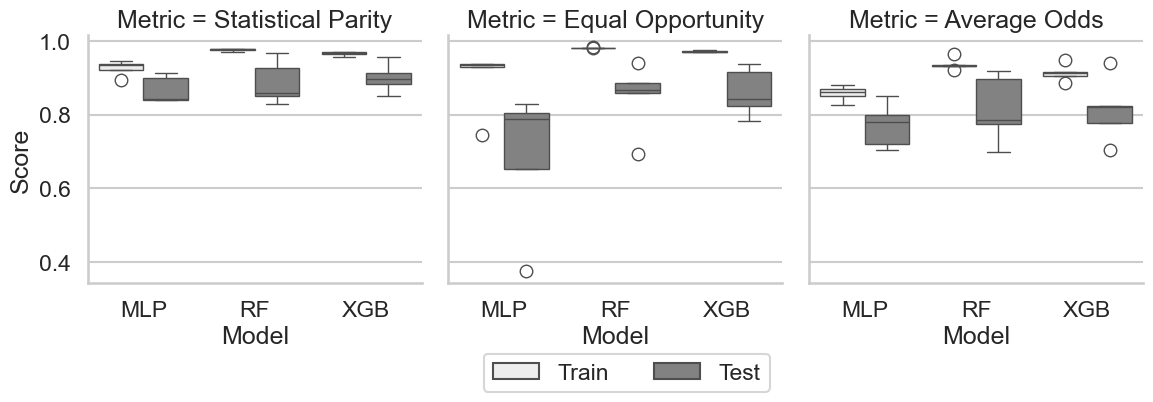

In [65]:
auc = get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test)
g = sns.FacetGrid(auc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig('figs/auc_mlp.pdf', bbox_inches='tight')
plt.show()

## Average Precision Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


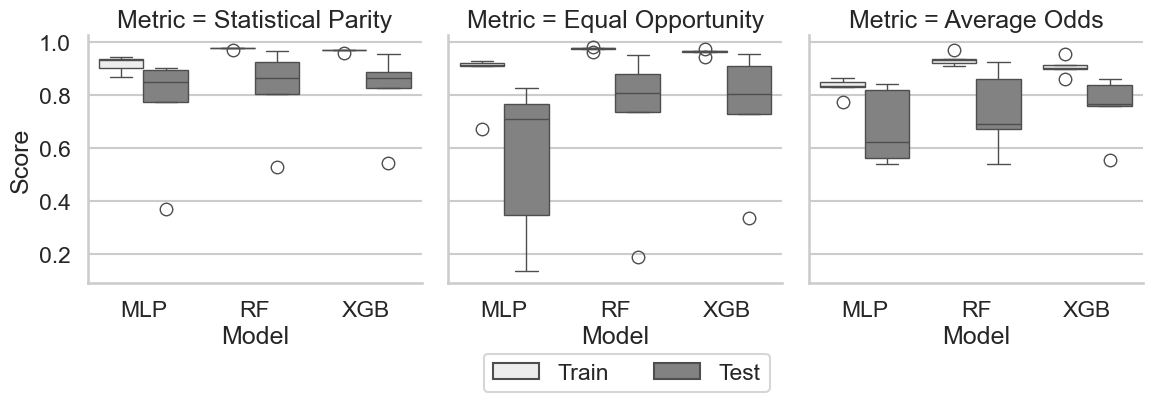

In [66]:
ap = get_full_metrics(sp_mlp_train_ap, sp_rf_train_ap, sp_xgb_train_ap, sp_mlp_test_ap, sp_rf_test_ap, sp_xgb_test_ap, eo_mlp_train_ap, eo_rf_train_ap, eo_xgb_train_ap, eo_mlp_test_ap, eo_rf_test_ap, eo_xgb_test_ap, ao_mlp_train_ap, ao_rf_train_ap, ao_xgb_train_ap, ao_mlp_test_ap, ao_rf_test_ap, ao_xgb_test_ap)
g = sns.FacetGrid(ap, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig("figs/ap_mlp.pdf", bbox_inches="tight")
plt.show()

## Precision

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


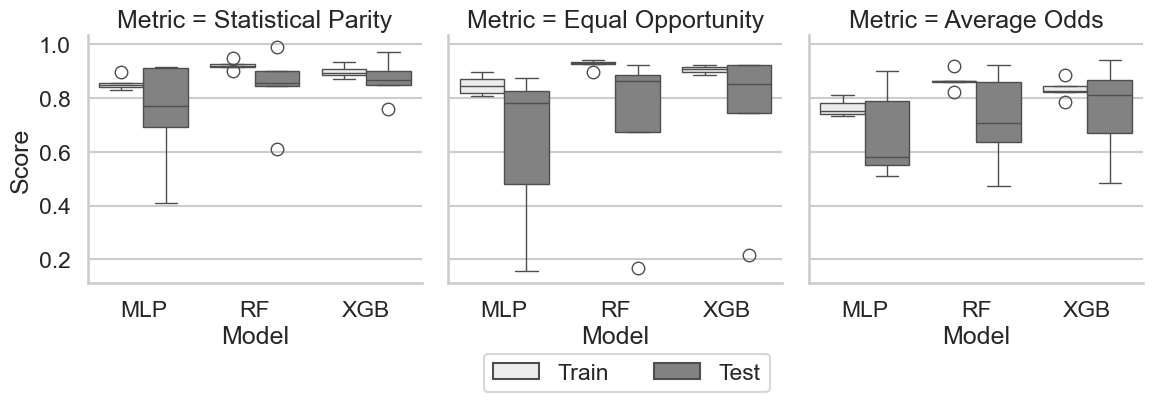

In [67]:
prec = get_full_metrics(sp_mlp_train_prec, sp_rf_train_prec, sp_xgb_train_prec, sp_mlp_test_prec, sp_rf_test_prec, sp_xgb_test_prec, eo_mlp_train_prec, eo_rf_train_prec, eo_xgb_train_prec, eo_mlp_test_prec, eo_rf_test_prec, eo_xgb_test_prec, ao_mlp_train_prec, ao_rf_train_prec, ao_xgb_train_prec, ao_mlp_test_prec, ao_rf_test_prec, ao_xgb_test_prec)
g = sns.FacetGrid(prec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/prec_mlp.pdf", bbox_inches="tight")
plt.show()

## Recall

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


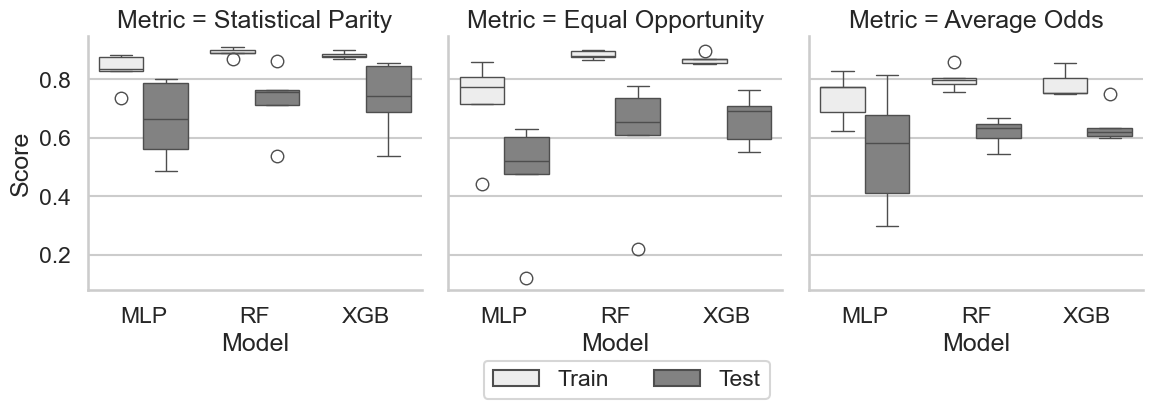

In [68]:
rec = get_full_metrics(sp_mlp_train_rec, sp_rf_train_rec, sp_xgb_train_rec, sp_mlp_test_rec, sp_rf_test_rec, sp_xgb_test_rec, eo_mlp_train_rec, eo_rf_train_rec, eo_xgb_train_rec, eo_mlp_test_rec, eo_rf_test_rec, eo_xgb_test_rec, ao_mlp_train_rec, ao_rf_train_rec, ao_xgb_train_rec, ao_mlp_test_rec, ao_rf_test_rec, ao_xgb_test_rec)
g = sns.FacetGrid(rec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Recall")
g.figure.savefig("figs/rec_mlp.pdf", bbox_inches="tight")
plt.show()

## F1 Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


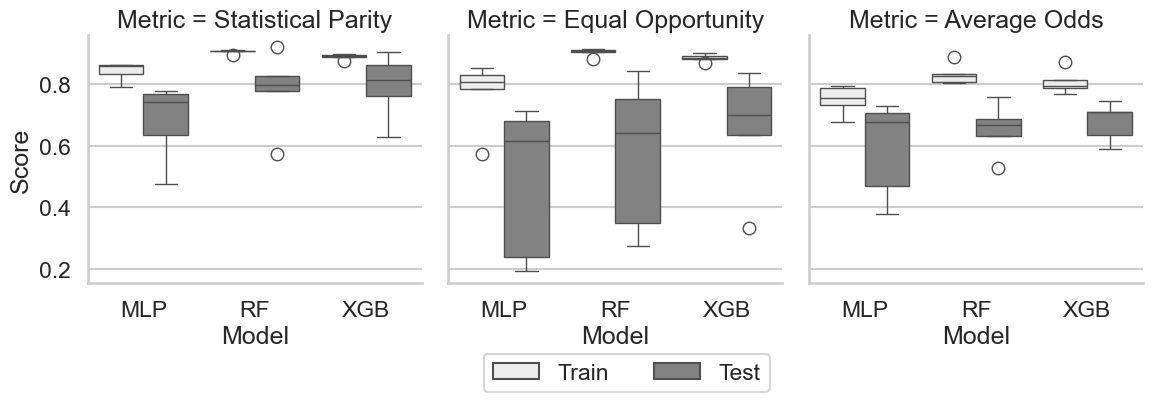

In [69]:
f1 = get_full_metrics(sp_mlp_train_f1, sp_rf_train_f1, sp_xgb_train_f1, sp_mlp_test_f1, sp_rf_test_f1, sp_xgb_test_f1, eo_mlp_train_f1, eo_rf_train_f1, eo_xgb_train_f1, eo_mlp_test_f1, eo_rf_test_f1, eo_xgb_test_f1, ao_mlp_train_f1, ao_rf_train_f1, ao_xgb_train_f1, ao_mlp_test_f1, ao_rf_test_f1, ao_xgb_test_f1)
g = sns.FacetGrid(f1, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/f1_mlp.pdf", bbox_inches="tight")
plt.show()

## Accuracy Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


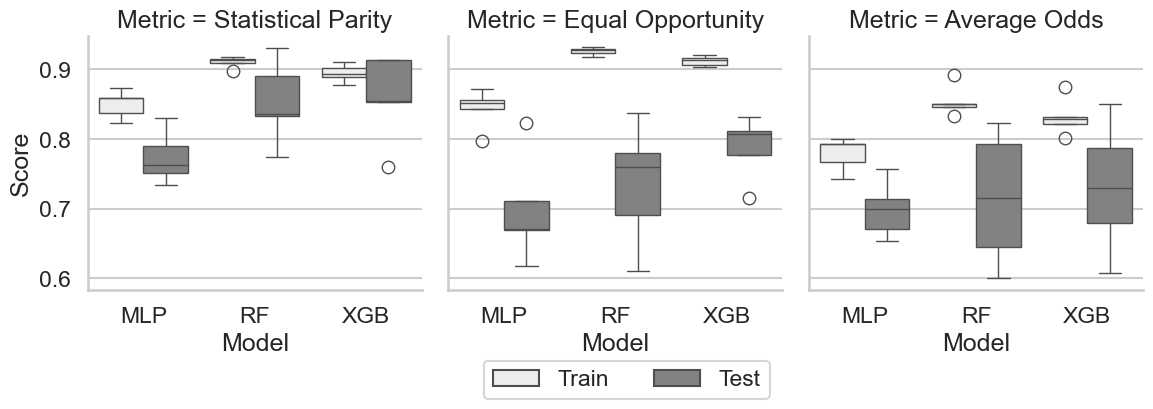

In [70]:
acc = get_full_metrics(sp_mlp_train_acc, sp_rf_train_acc, sp_xgb_train_acc, sp_mlp_test_acc, sp_rf_test_acc, sp_xgb_test_acc, eo_mlp_train_acc, eo_rf_train_acc, eo_xgb_train_acc, eo_mlp_test_acc, eo_rf_test_acc, eo_xgb_test_acc, ao_mlp_train_acc, ao_rf_train_acc, ao_xgb_train_acc, ao_mlp_test_acc, ao_rf_test_acc, ao_xgb_test_acc)
g = sns.FacetGrid(acc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy Score")
g.savefig("figs/acc_mlp.pdf", bbox_inches="tight")
plt.show()

## RF Data

In [71]:
mlp = MLPClassifier(
    alpha=0.01,
    hidden_layer_sizes=(50,50),
    learning_rate="constant",
    learning_rate_init=0.01,
    max_iter=300,
)
rf = RandomForestClassifier(
    max_depth=10,
    max_features="log2",
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200,
)
xgb = XGBClassifier(
    colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=6, subsample=1.0
)

In [72]:
data = pd.read_csv('../data/bias_symptoms_rf.csv', index_col=[0,1])
data.index = data.index.droplevel(0)
labels = ['statistical_parity', 'equal_opportunity', 'average_odds']

In [73]:
# AUC

sp_mlp_train = []
sp_rf_train = []
sp_xgb_train = []
sp_mlp_test = []
sp_rf_test = []
sp_xgb_test = []

eo_mlp_train = []
eo_rf_train = []
eo_xgb_train = []
eo_mlp_test = []
eo_rf_test = []
eo_xgb_test = []

ao_mlp_train = []
ao_rf_train = []
ao_xgb_train = []
ao_mlp_test = []
ao_rf_test = []
ao_xgb_test = []

# Average Precision

sp_mlp_train_ap = []
sp_rf_train_ap = []
sp_xgb_train_ap = []
sp_mlp_test_ap = []
sp_rf_test_ap = []
sp_xgb_test_ap = []

eo_mlp_train_ap = []
eo_rf_train_ap = []
eo_xgb_train_ap = []
eo_mlp_test_ap = []
eo_rf_test_ap = []
eo_xgb_test_ap = []

ao_mlp_train_ap = []
ao_rf_train_ap = []
ao_xgb_train_ap = []
ao_mlp_test_ap = []
ao_rf_test_ap = []
ao_xgb_test_ap = []

# Precision

sp_mlp_train_prec = []
sp_rf_train_prec = []
sp_xgb_train_prec = []
sp_mlp_test_prec = []
sp_rf_test_prec = []
sp_xgb_test_prec = []

eo_mlp_train_prec = []
eo_rf_train_prec = []
eo_xgb_train_prec = []
eo_mlp_test_prec = []
eo_rf_test_prec = []
eo_xgb_test_prec = []

ao_mlp_train_prec = []
ao_rf_train_prec = []
ao_xgb_train_prec = []
ao_mlp_test_prec = []
ao_rf_test_prec = []
ao_xgb_test_prec = []

# Recall

sp_mlp_train_rec = []
sp_rf_train_rec = []
sp_xgb_train_rec = []
sp_mlp_test_rec = []
sp_rf_test_rec = []
sp_xgb_test_rec = []

eo_mlp_train_rec = []
eo_rf_train_rec = []
eo_xgb_train_rec = []
eo_mlp_test_rec = []
eo_rf_test_rec = []
eo_xgb_test_rec = []

ao_mlp_train_rec = []
ao_rf_train_rec = []
ao_xgb_train_rec = []
ao_mlp_test_rec = []
ao_rf_test_rec = []
ao_xgb_test_rec = []

# F1 Score

sp_mlp_train_f1 = []
sp_rf_train_f1 = []
sp_xgb_train_f1 = []
sp_mlp_test_f1 = []
sp_rf_test_f1 = []
sp_xgb_test_f1 = []

eo_mlp_train_f1 = []
eo_rf_train_f1 = []
eo_xgb_train_f1 = []
eo_mlp_test_f1 = []
eo_rf_test_f1 = []
eo_xgb_test_f1 = []

ao_mlp_train_f1 = []
ao_rf_train_f1 = []
ao_xgb_train_f1 = []
ao_mlp_test_f1 = []
ao_rf_test_f1 = []
ao_xgb_test_f1 = []

# Accuracy

sp_mlp_train_acc = []
sp_rf_train_acc = []
sp_xgb_train_acc = []
sp_mlp_test_acc = []
sp_rf_test_acc = []
sp_xgb_test_acc = []

eo_mlp_train_acc = []
eo_rf_train_acc = []
eo_xgb_train_acc = []
eo_mlp_test_acc = []
eo_rf_test_acc = []
eo_xgb_test_acc = []

ao_mlp_train_acc = []
ao_rf_train_acc = []
ao_xgb_train_acc = []
ao_mlp_test_acc = []
ao_rf_test_acc = []
ao_xgb_test_acc = []

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for itrain, itest in kfold.split(data.index.unique().values):
    train_index = data.index.unique()[itrain]
    test_index = data.index.unique()[itest]
    print(train_index)
    print(test_index)
    train = data.loc[train_index]
    test = data.loc[test_index]

    mlp.fit(train.drop(columns=labels), train[labels])
    rf.fit(train.drop(columns=labels), train[labels])
    xgb.fit(train.drop(columns=labels), train[labels])

    mlp_train = mlp.predict_proba(train.drop(columns=labels))
    rf_train = rf.predict_proba(train.drop(columns=labels))
    xgb_train = xgb.predict_proba(train.drop(columns=labels))
    mlp_test = mlp.predict_proba(test.drop(columns=labels))
    rf_test = rf.predict_proba(test.drop(columns=labels))
    xgb_test = xgb.predict_proba(test.drop(columns=labels))

    mlp_train_pred = mlp.predict(train.drop(columns=labels))
    rf_train_pred = rf.predict(train.drop(columns=labels))
    xgb_train_pred = xgb.predict(train.drop(columns=labels))
    mlp_test_pred = mlp.predict(test.drop(columns=labels))
    rf_test_pred = rf.predict(test.drop(columns=labels))
    xgb_test_pred = xgb.predict(test.drop(columns=labels))

    sp_mlp_train.append(roc_auc_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train.append(roc_auc_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train.append(roc_auc_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test.append(roc_auc_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test.append(roc_auc_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test.append(roc_auc_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train.append(roc_auc_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train.append(roc_auc_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train.append(roc_auc_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test.append(roc_auc_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test.append(roc_auc_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test.append(roc_auc_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train.append(roc_auc_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train.append(roc_auc_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train.append(roc_auc_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test.append(roc_auc_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test.append(roc_auc_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test.append(roc_auc_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_ap.append(average_precision_score(train["statistical_parity"], mlp_train[:, 0]))
    sp_rf_train_ap.append(average_precision_score(train["statistical_parity"], rf_train[0][:, 1]))
    sp_xgb_train_ap.append(average_precision_score(train["statistical_parity"], xgb_train[:, 0]))
    sp_mlp_test_ap.append(average_precision_score(test["statistical_parity"], mlp_test[:, 0]))
    sp_rf_test_ap.append(average_precision_score(test["statistical_parity"], rf_test[0][:, 1]))
    sp_xgb_test_ap.append(average_precision_score(test["statistical_parity"], xgb_test[:, 0]))

    eo_mlp_train_ap.append(average_precision_score(train["equal_opportunity"], mlp_train[:, 1]))
    eo_rf_train_ap.append(average_precision_score(train["equal_opportunity"], rf_train[1][:, 1]))
    eo_xgb_train_ap.append(average_precision_score(train["equal_opportunity"], xgb_train[:, 1]))
    eo_mlp_test_ap.append(average_precision_score(test["equal_opportunity"], mlp_test[:, 1]))
    eo_rf_test_ap.append(average_precision_score(test["equal_opportunity"], rf_test[1][:, 1]))
    eo_xgb_test_ap.append(average_precision_score(test["equal_opportunity"], xgb_test[:, 1]))

    ao_mlp_train_ap.append(average_precision_score(train["average_odds"], mlp_train[:, 2]))
    ao_rf_train_ap.append(average_precision_score(train["average_odds"], rf_train[2][:, 1]))
    ao_xgb_train_ap.append(average_precision_score(train["average_odds"], xgb_train[:, 2]))
    ao_mlp_test_ap.append(average_precision_score(test["average_odds"], mlp_test[:, 2]))
    ao_rf_test_ap.append(average_precision_score(test["average_odds"], rf_test[2][:, 1]))
    ao_xgb_test_ap.append(average_precision_score(test["average_odds"], xgb_test[:, 2]))

    sp_mlp_train_prec.append(precision_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_prec.append(precision_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_prec.append(precision_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_prec.append(precision_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_prec.append(precision_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_prec.append(precision_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_prec.append(precision_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_prec.append(precision_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_prec.append(precision_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_prec.append(precision_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_prec.append(precision_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_prec.append(precision_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_prec.append(precision_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_prec.append(precision_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_prec.append(precision_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_prec.append(precision_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_prec.append(precision_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_prec.append(precision_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_rec.append(recall_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_rec.append(recall_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_rec.append(recall_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_rec.append(recall_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_rec.append(recall_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_rec.append(recall_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_rec.append(recall_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_rec.append(recall_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_rec.append(recall_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_rec.append(recall_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_rec.append(recall_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_rec.append(recall_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_rec.append(recall_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_rec.append(recall_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_rec.append(recall_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_rec.append(recall_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_rec.append(recall_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_rec.append(recall_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_f1.append(f1_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_f1.append(f1_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_f1.append(f1_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_f1.append(f1_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_f1.append(f1_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_f1.append(f1_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_f1.append(f1_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_f1.append(f1_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_f1.append(f1_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_f1.append(f1_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_f1.append(f1_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_f1.append(f1_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_f1.append(f1_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_f1.append(f1_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_f1.append(f1_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_f1.append(f1_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_f1.append(f1_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_f1.append(f1_score(test["average_odds"], xgb_test_pred[:, 2]))

    sp_mlp_train_acc.append(accuracy_score(train["statistical_parity"], mlp_train_pred[:, 0]))
    sp_rf_train_acc.append(accuracy_score(train["statistical_parity"], rf_train_pred[:, 0]))
    sp_xgb_train_acc.append(accuracy_score(train["statistical_parity"], xgb_train_pred[:, 0]))
    sp_mlp_test_acc.append(accuracy_score(test["statistical_parity"], mlp_test_pred[:, 0]))
    sp_rf_test_acc.append(accuracy_score(test["statistical_parity"], rf_test_pred[:, 0]))
    sp_xgb_test_acc.append(accuracy_score(test["statistical_parity"], xgb_test_pred[:, 0]))

    eo_mlp_train_acc.append(accuracy_score(train["equal_opportunity"], mlp_train_pred[:, 1]))
    eo_rf_train_acc.append(accuracy_score(train["equal_opportunity"], rf_train_pred[:, 1]))
    eo_xgb_train_acc.append(accuracy_score(train["equal_opportunity"], xgb_train_pred[:, 1]))
    eo_mlp_test_acc.append(accuracy_score(test["equal_opportunity"], mlp_test_pred[:, 1]))
    eo_rf_test_acc.append(accuracy_score(test["equal_opportunity"], rf_test_pred[:, 1]))
    eo_xgb_test_acc.append(accuracy_score(test["equal_opportunity"], xgb_test_pred[:, 1]))

    ao_mlp_train_acc.append(accuracy_score(train["average_odds"], mlp_train_pred[:, 2]))
    ao_rf_train_acc.append(accuracy_score(train["average_odds"], rf_train_pred[:, 2]))
    ao_xgb_train_acc.append(accuracy_score(train["average_odds"], xgb_train_pred[:, 2]))
    ao_mlp_test_acc.append(accuracy_score(test["average_odds"], mlp_test_pred[:, 2]))
    ao_rf_test_acc.append(accuracy_score(test["average_odds"], rf_test_pred[:, 2]))
    ao_xgb_test_acc.append(accuracy_score(test["average_odds"], xgb_test_pred[:, 2]))

Index(['arrhythmia', 'bank', 'cmc', 'compas', 'credit', 'crime', 'diabetic',
       'german', 'health', 'ibm', 'law', 'medical', 'obesity', 'placement',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['adult', 'drug', 'hearth', 'park', 'resyduo'], dtype='object', name='data')
Index(['adult', 'bank', 'cmc', 'compas', 'crime', 'diabetic', 'drug', 'health',
       'hearth', 'ibm', 'medical', 'obesity', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['arrhythmia', 'credit', 'german', 'law', 'us'], dtype='object', name='data')
Index(['adult', 'arrhythmia', 'credit', 'crime', 'diabetic', 'drug', 'german',
       'health', 'hearth', 'law', 'medical', 'park', 'placement', 'resyduo',
       'ricci', 'student', 'us', 'vaccine', 'wine'],
      dtype='object', name='data')
Index(['bank', 'cmc', 'compas', 'ibm', 'obesity'], dtype='object', name='data')
Index(['adult', 'arrhythmia'

In [74]:
sp_data_full_xgb = pd.DataFrame(
    {
        "ap": sp_xgb_test_ap,
        "accuracy": sp_xgb_test_acc,
        "precision": sp_xgb_test_prec,
        "recall": sp_xgb_test_rec,
        "f1": sp_xgb_test_f1,
    }
)
sp_data_full_xgb["model"] = "XGBoost"
sp_data_full_rf = pd.DataFrame(
    {
        "ap": sp_rf_test_ap,
        "accuracy": sp_rf_test_acc,
        "precision": sp_rf_test_prec,
        "recall": sp_rf_test_rec,
        "f1": sp_rf_test_f1,
    }
)
sp_data_full_rf["model"] = "Random Forest"
sp_data_full_mlp = pd.DataFrame(
    {
        "ap": sp_mlp_test_ap,
        "accuracy": sp_mlp_test_acc,
        "precision": sp_mlp_test_prec,
        "recall": sp_mlp_test_rec,
        "f1": sp_mlp_test_f1,
    }
)
sp_data_full_mlp["model"] = "MLP"
sp_data_full = pd.concat([sp_data_full_xgb, sp_data_full_rf, sp_data_full_mlp])

eo_data_full_xgb = pd.DataFrame(
    {
        "ap": eo_xgb_test_ap,
        "accuracy": eo_xgb_test_acc,
        "precision": eo_xgb_test_prec,
        "recall": eo_xgb_test_rec,
        "f1": eo_xgb_test_f1,
    }
)
eo_data_full_xgb["model"] = "XGBoost"
eo_data_full_rf = pd.DataFrame(
    {
        "ap": eo_rf_test_ap,
        "accuracy": eo_rf_test_acc,
        "precision": eo_rf_test_prec,
        "recall": eo_rf_test_rec,
        "f1": eo_rf_test_f1,
    }
)
eo_data_full_rf["model"] = "Random Forest"
eo_data_full_mlp = pd.DataFrame(
    {
        "ap": eo_mlp_test_ap,
        "accuracy": eo_mlp_test_acc,
        "precision": eo_mlp_test_prec,
        "recall": eo_mlp_test_rec,
        "f1": eo_mlp_test_f1,
    }
)
eo_data_full_mlp["model"] = "MLP"
eo_data_full = pd.concat([eo_data_full_xgb, eo_data_full_rf, eo_data_full_mlp])

ao_data_full_xgb = pd.DataFrame(
    {
        "ap": ao_xgb_test_ap,
        "accuracy": ao_xgb_test_acc,
        "precision": ao_xgb_test_prec,
        "recall": ao_xgb_test_rec,
        "f1": ao_xgb_test_f1,
    }
)
ao_data_full_xgb["model"] = "XGBoost"
ao_data_full_rf = pd.DataFrame(
    {
        "ap": ao_rf_test_ap,
        "accuracy": ao_rf_test_acc,
        "precision": ao_rf_test_prec,
        "recall": ao_rf_test_rec,
        "f1": ao_rf_test_f1,
    }
)
ao_data_full_rf["model"] = "Random Forest"
ao_data_full_mlp = pd.DataFrame(
    {
        "ap": ao_mlp_test_ap,
        "accuracy": ao_mlp_test_acc,
        "precision": ao_mlp_test_prec,
        "recall": ao_mlp_test_rec,
        "f1": ao_mlp_test_f1,
    }
)
ao_data_full_mlp["model"] = "MLP"
ao_data_full = pd.concat([ao_data_full_xgb, ao_data_full_rf, ao_data_full_mlp])

In [75]:
compute_kruscal(sp_data_full_xgb, sp_data_full_mlp, sp_data_full_rf)
compute_kruscal(eo_data_full_xgb, eo_data_full_mlp, eo_data_full_rf)
compute_kruscal(ao_data_full_xgb, ao_data_full_mlp, ao_data_full_rf)

KruskalResult(statistic=5.579999999999998, pvalue=0.06142121391500018)
KruskalResult(statistic=5.660000000000004, pvalue=0.05901285366944773)
KruskalResult(statistic=3.8400000000000034, pvalue=0.1466069621303499)
KruskalResult(statistic=1.2600000000000051, pvalue=0.532591801006896)
KruskalResult(statistic=6.5, pvalue=0.03877420783172202)
KruskalResult(statistic=0.18000000000000682, pvalue=0.9139311852712251)
KruskalResult(statistic=0.9166368515205716, pvalue=0.6323460888614962)
KruskalResult(statistic=0.2600000000000051, pvalue=0.8780954309205591)
KruskalResult(statistic=0.045405405405414295, pvalue=0.9775530644607349)
KruskalResult(statistic=0.0800000000000054, pvalue=0.9607894391523206)
KruskalResult(statistic=0.740000000000002, pvalue=0.6907343306373539)
KruskalResult(statistic=0.38000000000000256, pvalue=0.8269591339433613)
KruskalResult(statistic=0.7800000000000011, pvalue=0.6770568744981644)
KruskalResult(statistic=0.740000000000002, pvalue=0.6907343306373539)
KruskalResult(stati

In [76]:
def group_metrics(data):
    return data.groupby("model").agg(["mean", "std"]).reset_index()

In [77]:
sp = group_metrics(sp_data_full)
eo = group_metrics(eo_data_full)
ao = group_metrics(ao_data_full)
full_data = pd.concat([sp_data_full, eo_data_full, ao_data_full])
full = group_metrics(full_data)

In [78]:
sp

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.747739  0.080904  0.731693  0.060995  0.716896  0.116376   
1  Random Forest  0.867095  0.047672  0.809325  0.054689  0.838795  0.065546   
2        XGBoost  0.828340  0.072090  0.837507  0.062594  0.831759  0.059469   

     recall                  f1            
       mean       std      mean       std  
0  0.683124  0.187226  0.675461  0.080130  
1  0.695132  0.061444  0.758032  0.044913  
2  0.767440  0.095426  0.797387  0.076389

In [79]:
eo

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.578490  0.273988  0.720625  0.087104  0.574254  0.274115   
1  Random Forest  0.636432  0.333179  0.730776  0.074971  0.647204  0.366846   
2        XGBoost  0.644626  0.319009  0.749068  0.065129  0.649947  0.331441   

     recall                  f1            
       mean       std      mean       std  
0  0.478211  0.223958  0.482216  0.232586  
1  0.472996  0.219457  0.498366  0.264173  
2  0.465017  0.196346  0.510581  0.236571

In [80]:
ao

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.670001  0.157253  0.694566  0.067867  0.643609  0.155276   
1  Random Forest  0.752719  0.134262  0.678900  0.100323  0.710868  0.159794   
2        XGBoost  0.743364  0.138649  0.690396  0.102788  0.719874  0.162754   

     recall                  f1            
       mean       std      mean       std  
0  0.722138  0.089823  0.672478  0.110134  
1  0.634753  0.202089  0.637065  0.074431  
2  0.642325  0.195933  0.647638  0.096059

In [81]:
full

model        ap            accuracy           precision            \
                      mean       std      mean       std      mean       std   
0            MLP  0.665410  0.188442  0.715628  0.069327  0.644920  0.189370   
1  Random Forest  0.752082  0.216835  0.739667  0.091739  0.732289  0.231892   
2        XGBoost  0.738777  0.205163  0.758990  0.096267  0.733860  0.214413   

     recall                  f1            
       mean       std      mean       std  
0  0.627824  0.197267  0.610052  0.171791  
1  0.600960  0.189555  0.631154  0.184818  
2  0.624927  0.202680  0.651869  0.187062

In [82]:
sp.to_csv("bias_symptoms_sp_rf.csv")
eo.to_csv("bias_symptoms_eo_rf.csv")
ao.to_csv("bias_symptoms_ao_rf.csv")
full.to_csv("bias_symptoms_full_rf.csv")

In [47]:
def get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test):
    df_sp = pd.DataFrame(
        {"MLP": sp_mlp_train, "RF": sp_rf_train, "XGB": sp_xgb_train, "Fold": "Train"}
    )
    df_sp = pd.concat(
        [
            df_sp,
            pd.DataFrame(
                {"MLP": sp_mlp_test, "RF": sp_rf_test, "XGB": sp_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_sp = pd.melt(df_sp, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_sp["Metric"] = "Statistical Parity"
    df_eo = pd.DataFrame(
        {"MLP": eo_mlp_train, "RF": eo_rf_train, "XGB": eo_xgb_train, "Fold": "Train"}
    )
    df_eo = pd.concat(
        [
            df_eo,
            pd.DataFrame(
                {"MLP": eo_mlp_test, "RF": eo_rf_test, "XGB": eo_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_eo = pd.melt(df_eo, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_eo["Metric"] = "Equal Opportunity"

    df_ao = pd.DataFrame(
        {"MLP": ao_mlp_train, "RF": ao_rf_train, "XGB": ao_xgb_train, "Fold": "Train"}
    )
    df_ao = pd.concat(
        [
            df_ao,
            pd.DataFrame(
                {"MLP": ao_mlp_test, "RF": ao_rf_test, "XGB": ao_xgb_test, "Fold": "Test"}
            ),
        ]
    )
    df_ao = pd.melt(df_ao, id_vars=["Fold"], var_name="Model", value_name="Score")
    df_ao["Metric"] = "Average Odds"
    auc = pd.concat([df_sp, df_eo, df_ao])
    return auc

## AUC Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


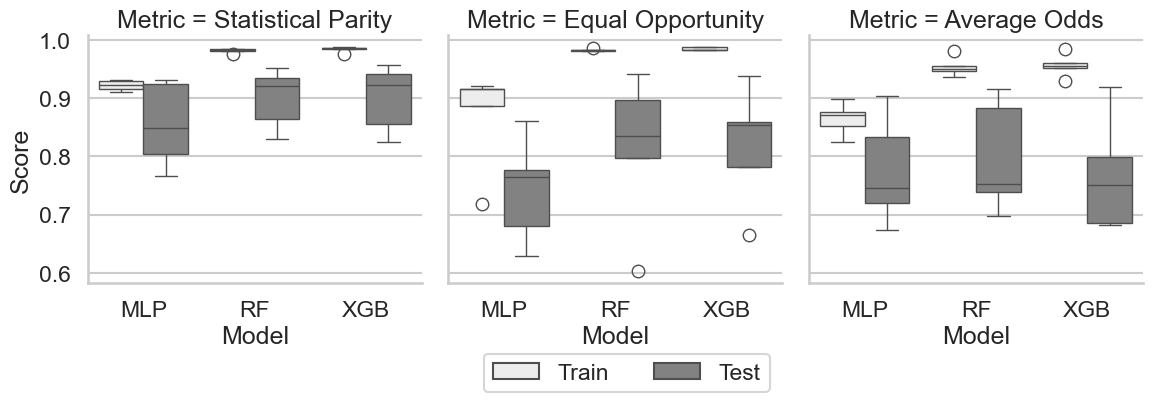

In [ ]:
auc = get_full_metrics(sp_mlp_train, sp_rf_train, sp_xgb_train, sp_mlp_test, sp_rf_test, sp_xgb_test, eo_mlp_train, eo_rf_train, eo_xgb_train, eo_mlp_test, eo_rf_test, eo_xgb_test, ao_mlp_train, ao_rf_train, ao_xgb_train, ao_mlp_test, ao_rf_test, ao_xgb_test)
g = sns.FacetGrid(auc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig('figs/auc_rf.pdf', bbox_inches='tight')
plt.show()

## Average Precision Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


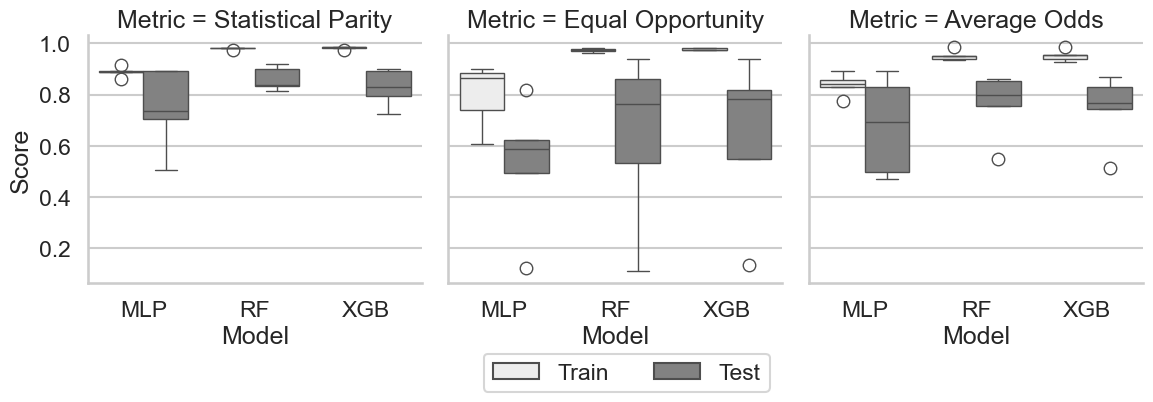

In [ ]:
ap = get_full_metrics(sp_mlp_train_ap, sp_rf_train_ap, sp_xgb_train_ap, sp_mlp_test_ap, sp_rf_test_ap, sp_xgb_test_ap, eo_mlp_train_ap, eo_rf_train_ap, eo_xgb_train_ap, eo_mlp_test_ap, eo_rf_test_ap, eo_xgb_test_ap, ao_mlp_train_ap, ao_rf_train_ap, ao_xgb_train_ap, ao_mlp_test_ap, ao_rf_test_ap, ao_xgb_test_ap)
g = sns.FacetGrid(ap, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
# g.fig.suptitle('AUC Score')
g.fig.subplots_adjust(top=0.85)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.savefig("figs/ap_rf.pdf", bbox_inches="tight")
plt.show()

## Precision

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


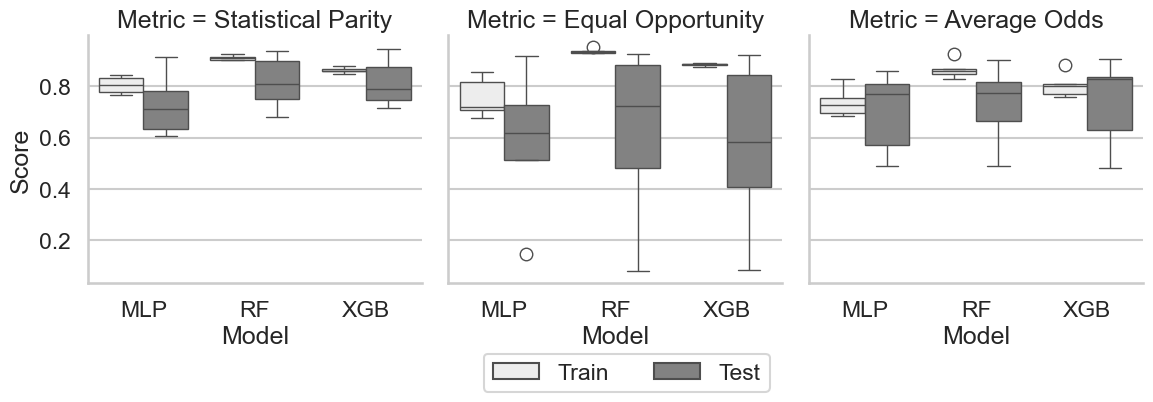

In [ ]:
prec = get_full_metrics(sp_mlp_train_prec, sp_rf_train_prec, sp_xgb_train_prec, sp_mlp_test_prec, sp_rf_test_prec, sp_xgb_test_prec, eo_mlp_train_prec, eo_rf_train_prec, eo_xgb_train_prec, eo_mlp_test_prec, eo_rf_test_prec, eo_xgb_test_prec, ao_mlp_train_prec, ao_rf_train_prec, ao_xgb_train_prec, ao_mlp_test_prec, ao_rf_test_prec, ao_xgb_test_prec)
g = sns.FacetGrid(prec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/prec_rf.pdf", bbox_inches="tight")
plt.show()

## Recall

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


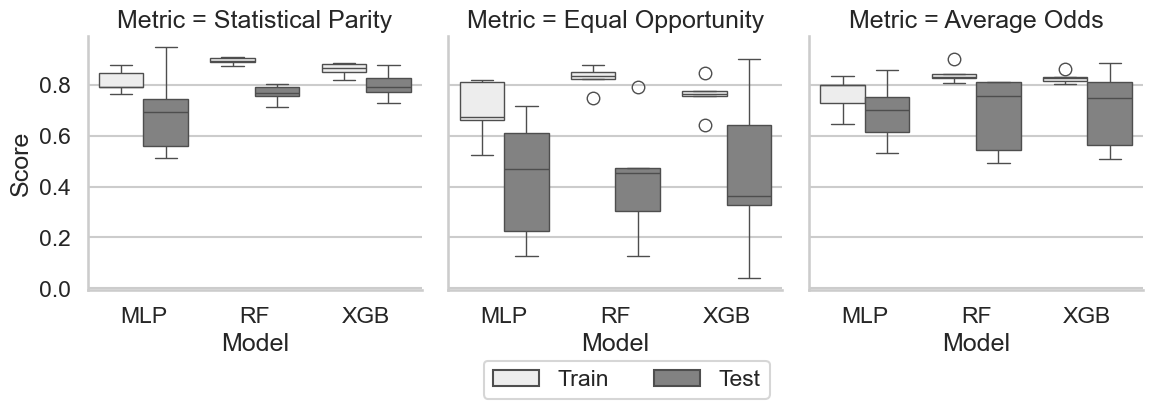

In [ ]:
rec = get_full_metrics(sp_mlp_train_rec, sp_rf_train_rec, sp_xgb_train_rec, sp_mlp_test_rec, sp_rf_test_rec, sp_xgb_test_rec, eo_mlp_train_rec, eo_rf_train_rec, eo_xgb_train_rec, eo_mlp_test_rec, eo_rf_test_rec, eo_xgb_test_rec, ao_mlp_train_rec, ao_rf_train_rec, ao_xgb_train_rec, ao_mlp_test_rec, ao_rf_test_rec, ao_xgb_test_rec)
g = sns.FacetGrid(rec, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Recall")
g.figure.savefig("figs/rec_rf.pdf", bbox_inches="tight")
plt.show()

## F1 Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


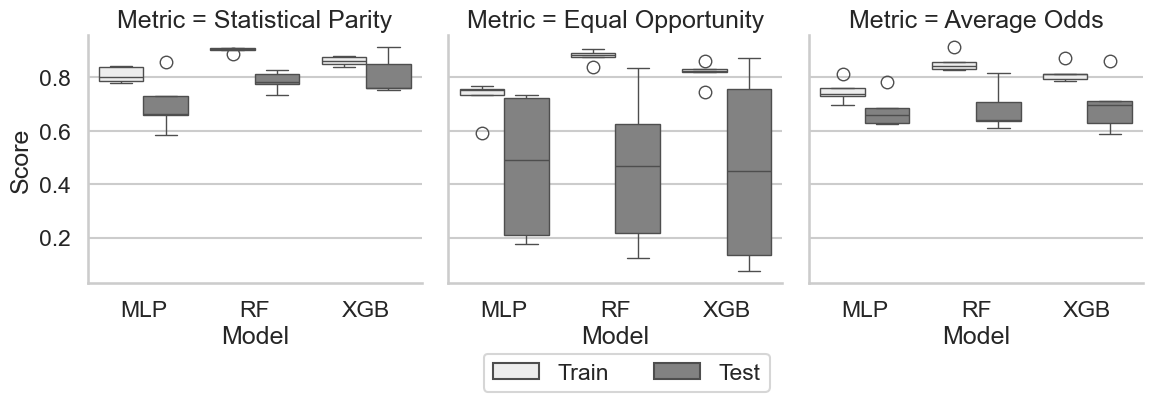

In [ ]:
f1 = get_full_metrics(sp_mlp_train_f1, sp_rf_train_f1, sp_xgb_train_f1, sp_mlp_test_f1, sp_rf_test_f1, sp_xgb_test_f1, eo_mlp_train_f1, eo_rf_train_f1, eo_xgb_train_f1, eo_mlp_test_f1, eo_rf_test_f1, eo_xgb_test_f1, ao_mlp_train_f1, ao_rf_train_f1, ao_xgb_train_f1, ao_mlp_test_f1, ao_rf_test_f1, ao_xgb_test_f1)
g = sns.FacetGrid(f1, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
# g.add_legend()
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("F1 Score")
g.figure.savefig("figs/f1_rf.pdf", bbox_inches="tight")
plt.show()

## Accuracy Score

c:\Users\giord\miniconda3\envs\sens_disc\lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


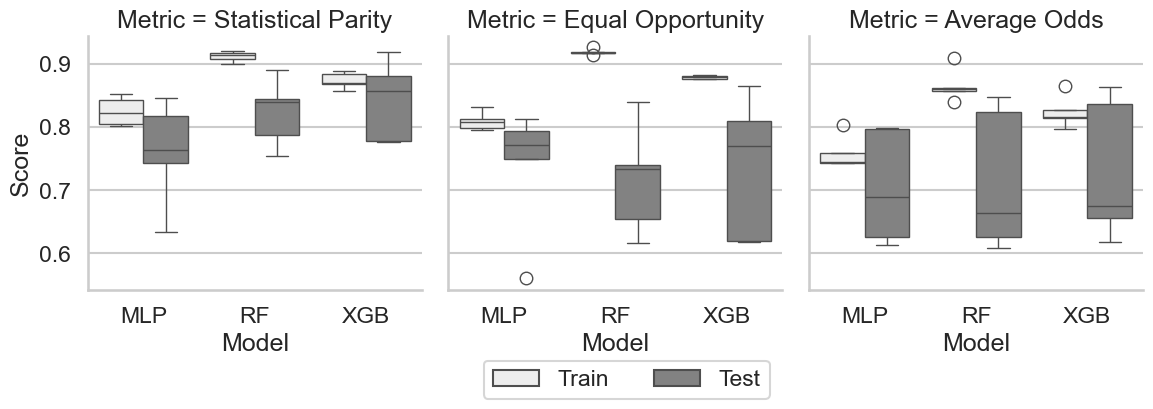

In [ ]:
acc = get_full_metrics(sp_mlp_train_acc, sp_rf_train_acc, sp_xgb_train_acc, sp_mlp_test_acc, sp_rf_test_acc, sp_xgb_test_acc, eo_mlp_train_acc, eo_rf_train_acc, eo_xgb_train_acc, eo_mlp_test_acc, eo_rf_test_acc, eo_xgb_test_acc, ao_mlp_train_acc, ao_rf_train_acc, ao_xgb_train_acc, ao_mlp_test_acc, ao_rf_test_acc, ao_xgb_test_acc)
g = sns.FacetGrid(acc, col="Metric", height=4, aspect=1)
g.map(
    sns.boxplot,
    "Model",
    "Score",
    "Fold",
    hue_order=["Train", "Test"],
    palette=sns.color_palette()[0:4:3],
)
g.add_legend(loc="lower center", ncols=2, bbox_to_anchor=(0.45, -0.07), frameon=True)
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle("Accuracy Score")
g.savefig("figs/acc_rf.pdf", bbox_inches="tight")
plt.show()